In [72]:
import numpy as np
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from IPython.display import display
import missingno as msno
from sklearn.model_selection import train_test_split

from sklearn import tree
model = tree.DecisionTreeClassifier()
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
dfc=RandomForestClassifier(n_estimators=100) #Create a Gaussian Classifier

from sklearn import linear_model
regr = linear_model.LinearRegression()

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


In [73]:
FileNameOutput_reopened = pd.read_csv(r'Sourcefile.csv')



C:\Users\rucco\AppData\Local\Temp\ipykernel_36960\3276953459.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  FileNameOutput_reopened = pd.read_csv(r'Sourcefile.csv')




Period of data collection is between   '2020-12-10 00:04:35'  and   '2021-02-17 07:39:36'  
67  Humidity critical values
254  Co2 critical values
8086  Tvoc critical values
Pm25: No over critical Value
missing values: 313
missing_column  Index(['Co2', 'Pm25', 'Tvoc'], dtype='object')
Missing data matrix:


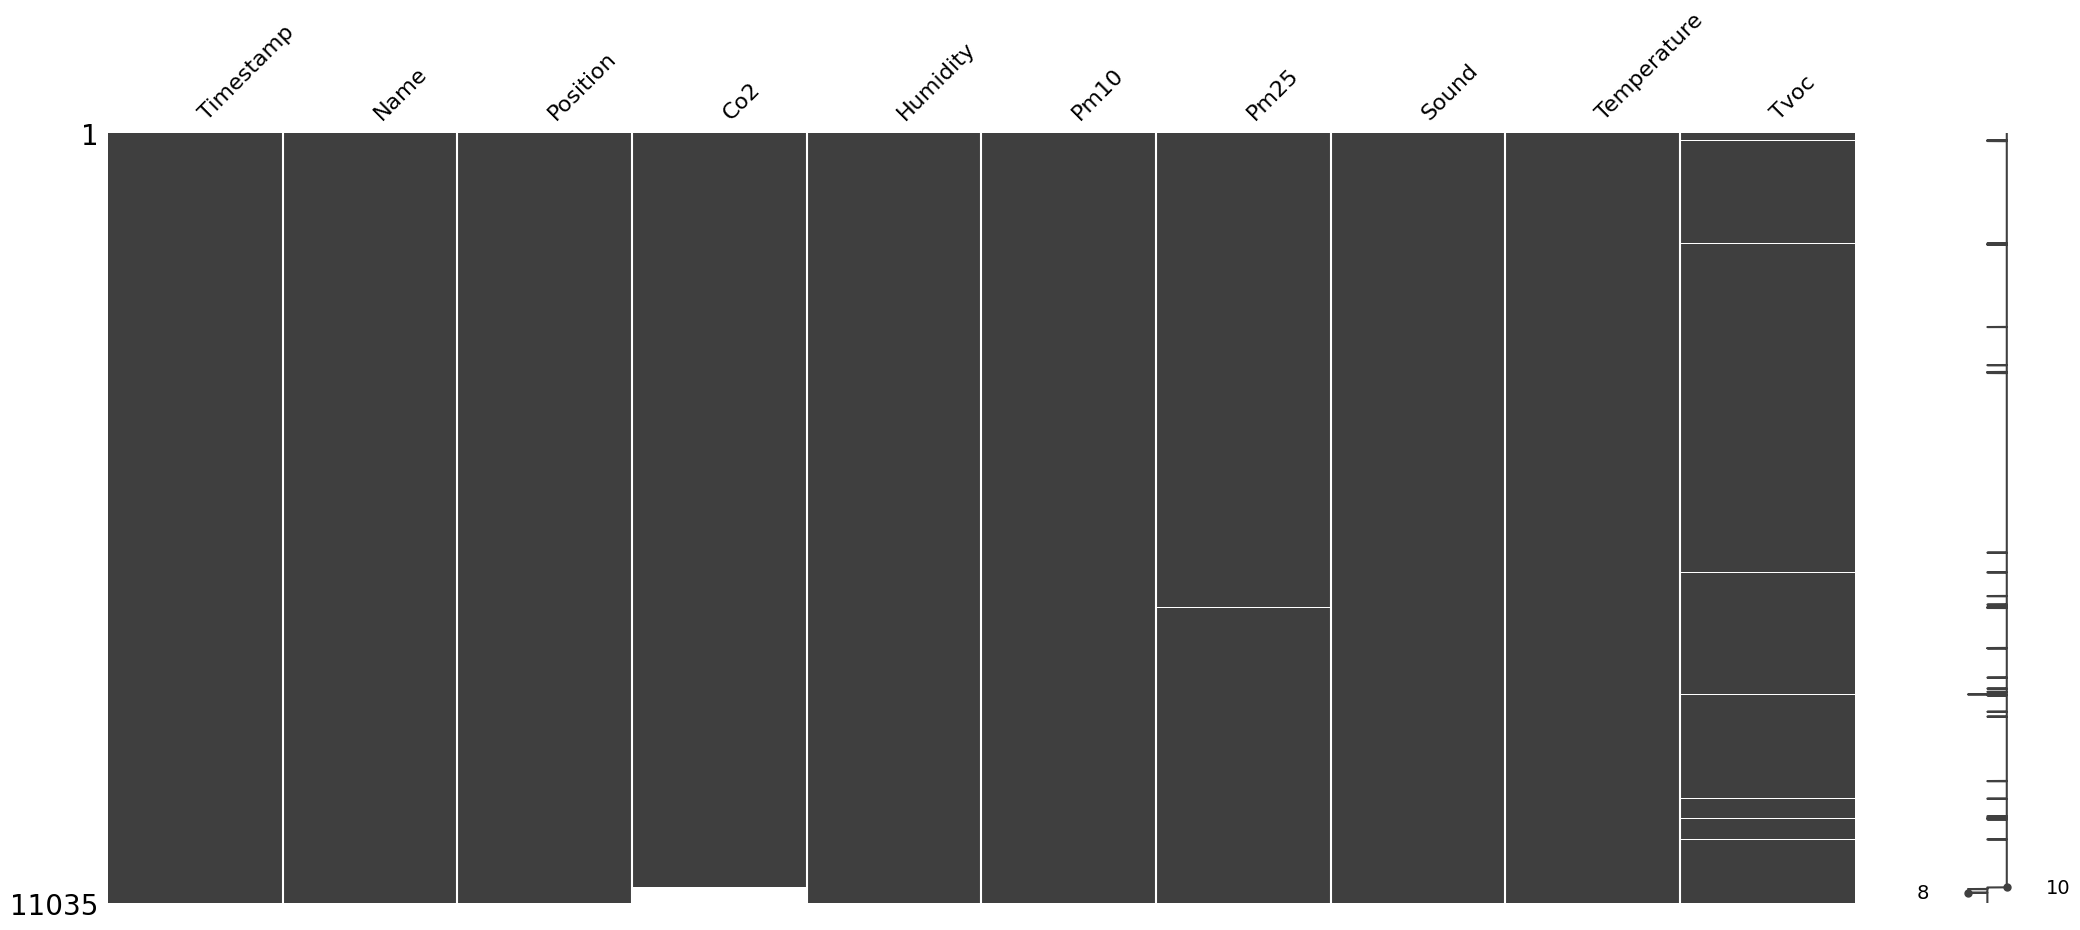



 
*** Description_Entire Dataset*** 


,Co2,Humidity,Pm10,Pm25,Sound,Temperature,Tvoc
count,10810.000000,11035.000000,11035.000000,11024.000000,11035.000000,11035.000000,10958.000000
mean,459.127197,47.252442,6.175804,5.175254,46.226643,19.680598,1360.018160
std,212.430575,7.529457,4.167172,4.135084,12.588999,1.023934,770.632925
min,283.000000,27.200000,1.000000,1.000000,28.400000,16.400000,1.000000
25%,334.000000,41.500000,4.000000,3.000000,35.900000,19.000000,554.250000
50%,367.000000,49.200000,5.000000,4.000000,43.400000,19.800000,2000.000000
75%,497.000000,53.300000,7.000000,6.000000,54.700000,20.400000,2000.000000
max,1651.000000,64.000000,35.000000,33.000000,88.000000,22.600000,2000.000000


(11035, 9)


 
*** Description_Co2 Dropna*** 
count    10810.000000
mean       459.127197
std        212.430575
min        283.000000
25%        334.000000
50%        367.000000
75%        497.000000
max       1651.000000
Name: Co2, dtype: float64
(10810, 9)


 
*** Description_Humidity Dropna*** 
count    11035.000000
mean        47.252442
std          7.529457
min         27.200000
25%         41.500000
50%         49.200000
75%         53.300000
max         64.000000
Name: Humidity, dtype: float64
(11035, 9)


 
*** Description_Tvoc Dropna*** 
count    10958.000000
mean      1360.018160
std        770.632925
min          1.000000
25%        554.250000
50%       2000.000000
75%       2000.000000
max       2000.000000
Name: Tvoc, dtype: float64
(10958, 9)




In [74]:
'''mood = "c"
while mood == 'c':
    if mood == "c":
        pass
    else:
        break
'''

    #################################################     
    ########### Selected Parameters df ##############
    #################################################
def param_selec(d1f):
    for col in d1f.columns:
        if col == "Tvoc":
            pass
        elif col == "Co2":
            pass
        elif col == "Pm10":
            pass
        elif col == "Pm25":
            pass
        elif col == "Humidity":
            pass
        elif col == "Temperature":
            pass
        elif col == "Sound":
            pass
        elif col == "Timestamp":
            pass
        elif col == "Nome":
            d1f.rename(columns={"Nome" : "Name"}, inplace=True)
        elif col == "Posizione":
            d1f.rename(columns={"Posizione" : "Position"}, inplace=True)            
        else:
            del d1f[col]
    return d1f                                                                            

########################################      
########### preparation  ###############
########################################
def lets_Clean(dfp):
    dfopt2 = dfp.copy(deep=True)
    dfopt2['Humidity'].values[dfopt2['Humidity'].values <= 60 ] = 0
    is_all_zero = np.all((dfopt2.Humidity == 0))
    if is_all_zero:
        print('Humidity: No over critical Value')
    else:
        counter = np.count_nonzero(dfopt2.Humidity)
        print(counter,' Humidity critical values')
        
    dfopt2['Co2'].values[dfopt2['Co2'].values <= 1500 ] = 0
    is_all_zero = np.all((dfopt2.Humidity == 0))
    if is_all_zero:
        print('Co2: No over critical Value')
    else:
        counter = np.count_nonzero(dfopt2.Co2)
        print(counter,' Co2 critical values')
        
    dfopt2['Tvoc'].values[dfopt2['Tvoc'].values <= 600 ] = 0
    is_all_zero = np.all((dfopt2.Tvoc == 0))
    if is_all_zero:
        print('Tvoc: No over critical Value')
    else:
        counter = np.count_nonzero(dfopt2.Tvoc)
        print(counter,' Tvoc critical values')
        
    dfopt2['Pm25'].values[dfopt2['Pm25'].values <= 35 ] = 0
    is_all_zero = np.all((dfopt2.Pm25 == 0))
    if is_all_zero:
        print('Pm25: No over critical Value')
    else:
        counter = np.count_nonzero(dfopt2.Pm25)
        print(counter,' Pm 25 critical values')     
    ########### Missing data => Na null NULL ##############
    # Missing data => Na null NULL 
    dfp.replace(0, np.nan, inplace=True)
    if dfp.isnull().values.any(): 
        print('missing values:', dfp.isnull().sum().sum())
        missing_column = dfp.columns[dfp.isnull().any()]
        print('missing_column ', missing_column)
        print("Missing data matrix:")
        MissingMatrixPlot = msno.matrix(dfp)
        plt.show() 
        MissingValuePercentage = df.isnull().mean()*100
    else:
        print('\n*** No missing values ***\n')
    
    dfp_ind_date = dfp.set_index('Timestamp')
    dfp_Co2 = dfp_ind_date.dropna(axis=0, subset = ['Co2'])
    dfp_Humidity = dfp_ind_date.dropna(axis=0, subset = ['Humidity'])
    dfp_Tvoc = dfp_ind_date.dropna(axis=0, subset = ['Tvoc'])
    return dfp, dfp_ind_date, dfp_Co2, dfp_Humidity, dfp_Tvoc 

    
########################################      
########### call functions #############
########################################
dataf = pd.read_csv(r'AIRCARE_3elem_report.csv')
df = param_selec(dataf)
fv = df['Timestamp'].iloc[0] # first element 
lv = df['Timestamp'].iloc[-1] # last element
na = df['Name'].iloc[0] # first element
po = df['Position'].iloc[0] # first element
print("\n")
print(f'Period of data collection is between \033[1m  {fv!r} \033[0m and \033[1m  {lv!r} \033[0m ')
    
_, d_f_ind_date, d_f_ind_date_Cleaned_Co2, d_f_ind_date_Cleaned_Humidity, d_f_ind_date_Cleaned_Tvoc = lets_Clean(df)


print("\n")
print("\033[1m \n*** Description_Entire Dataset*** \033[0m")
display(d_f_ind_date.describe())
print(d_f_ind_date.shape)
print("\n")
print("\033[1m \n*** Description_Co2 Dropna*** \033[0m")
print(d_f_ind_date_Cleaned_Co2.Co2.describe())
print(d_f_ind_date_Cleaned_Co2.shape)
print("\n")
print("\033[1m \n*** Description_Humidity Dropna*** \033[0m")
print(d_f_ind_date_Cleaned_Humidity.Humidity.describe())
print(d_f_ind_date_Cleaned_Humidity.shape)
print("\n")
print("\033[1m \n*** Description_Tvoc Dropna*** \033[0m")
print(d_f_ind_date_Cleaned_Tvoc.Tvoc.describe())
print(d_f_ind_date_Cleaned_Tvoc.shape)
print("\n")   




In [75]:
data = df.drop(['Timestamp', 'Name', 'Position', 'Pm10', 'Pm25', 'Sound', 'Temperature', 'Tvoc'], axis='columns')
df_DTree_inp = data.ffill().bfill()
df_DTree_inp = df_DTree_inp.round().astype(int)
df_DTree_inp['Co2_Threshold'] = np.where(df_DTree_inp['Co2'] < 1000 , 0, 1)
df_DTree_inp['Co2_Threshold'] = np.where(df_DTree_inp['Co2'] > 1000 , 1, df_DTree_inp['Co2_Threshold'])
df_DTree_inp['Co2_Threshold'] = np.where(df_DTree_inp['Co2'] > 1500 , 2, df_DTree_inp['Co2_Threshold'])
df_DTree_inp['Humidity_Threshold'] = np.where(df_DTree_inp['Humidity'] < 40 , 0, 1)
df_DTree_inp['Humidity_Threshold'] = np.where(df_DTree_inp['Humidity'] > 40 , 1, df_DTree_inp['Humidity_Threshold'])
df_DTree_inp['Humidity_Threshold'] = np.where(df_DTree_inp['Humidity'] > 60 , 2, df_DTree_inp['Humidity_Threshold'])

df_DTree_t = df_DTree_inp.copy(deep=True)
df_DTree_t.loc[df_DTree_t['Co2_Threshold'] + df_DTree_t['Humidity_Threshold'] == 0, 'Target_colum'] = 1
df_DTree_t.loc[df_DTree_t['Co2_Threshold'] + df_DTree_t['Humidity_Threshold'] == 1, 'Target_colum'] = 2
df_DTree_t.loc[df_DTree_t['Co2_Threshold'] + df_DTree_t['Humidity_Threshold'] == 2, 'Target_colum'] = 3
df_DTree_t.loc[df_DTree_t['Co2_Threshold'] + df_DTree_t['Humidity_Threshold'] == 3, 'Target_colum'] = 4
df_DTree_t.loc[df_DTree_t['Co2_Threshold'] + df_DTree_t['Humidity_Threshold'] == 4, 'Target_colum'] = 5
df_DTree_t["Target_colum"].fillna(1, inplace = True) 
df_DTree_target = df_DTree_t.drop(['Humidity', 'Co2', 'Humidity_Threshold', 'Co2_Threshold'], axis = 1)
df_DTree_input = df_DTree_inp.drop(['Humidity_Threshold', 'Co2_Threshold'], axis = 1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df_DTree_input,df_DTree_target,test_size=0.2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [77]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9986406887177164


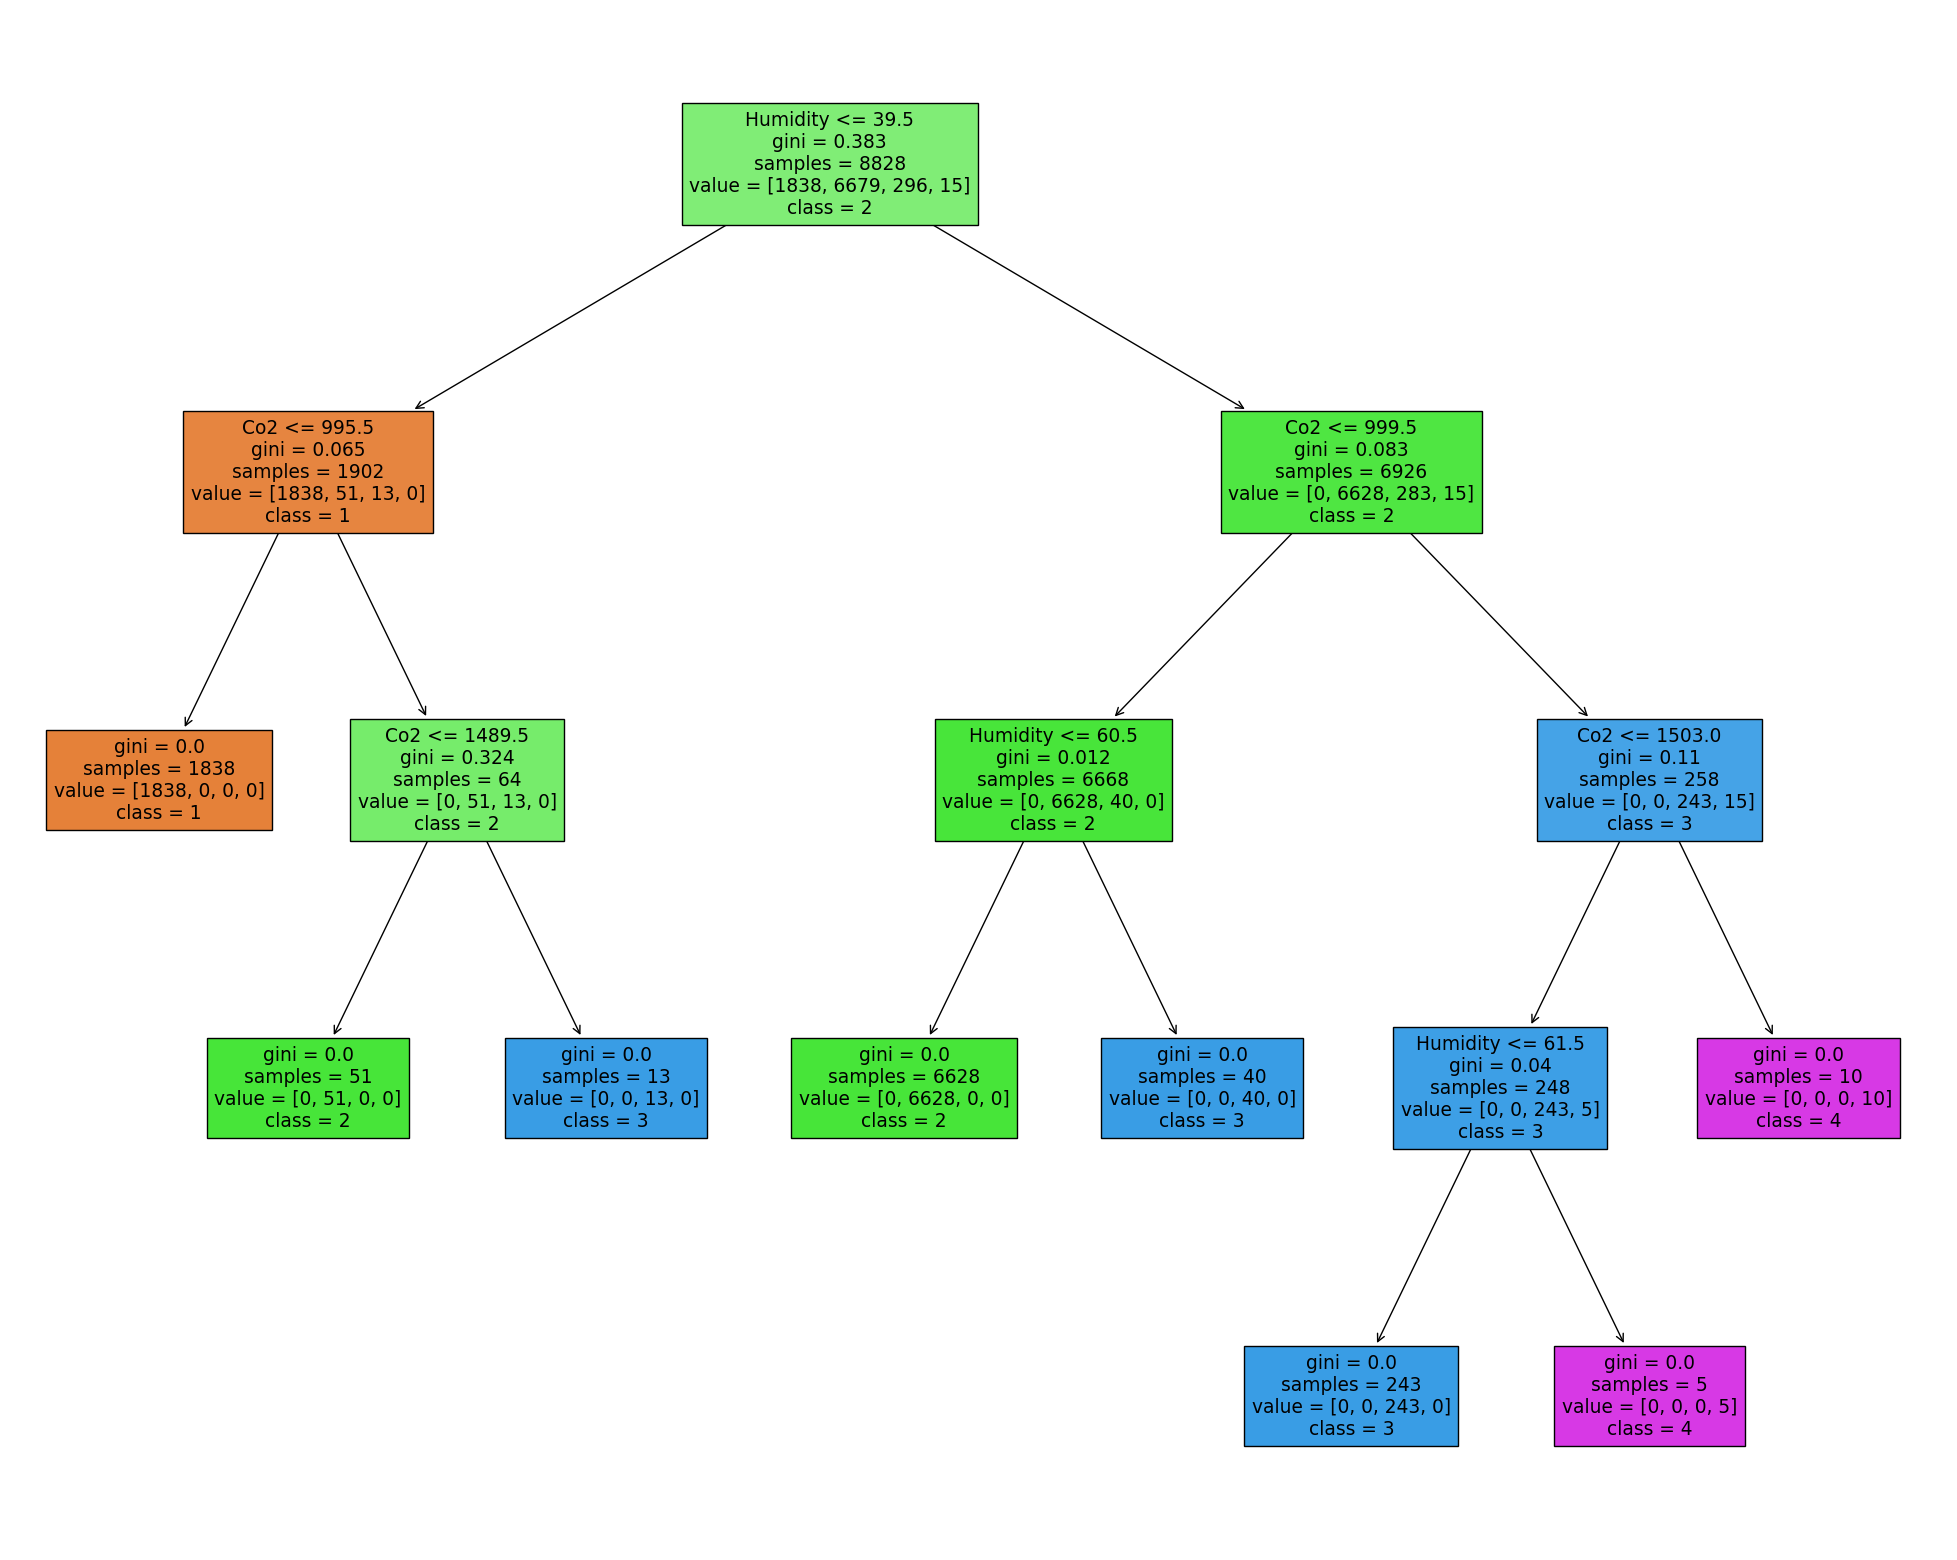

In [78]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names = ['Co2', 'Humidity'],
                   class_names=['1','2','3','4','5'],
                   filled=True)